# Linear Transformation

### Learning Objectives
- Seeing matrices as linear transformations and their properties.
- Examples of linear transforms.

### Outcomes
- Verifying if a transformation is linear.
- Using matrices as linear transformation.

### Linear Transformation 

We can think of a matrix as a linear transformation. Because when a matrix such as $T$ acts on a vector such as $a$, it satisfies two properties required for a transformation to be linear. These properties are:

1. For any vectors $a$ and $b$, we have $T(a + b) = T(a) + T(b)$.

2. For any scalar $c$, $T(c a) = cT(a)$.

Let's verify these properties.

In [17]:
import numpy as np

T = np.array([[1, 2], [-1, 3]])
a = np.array([-1, 1])
b = np.array([2, 1])
c = 2

x1 = np.dot(T, a + b)
x2 = np.dot(T, a) + np.dot(T, b)
result = np.array_equal(x1,x2)
print(x1,x2,result)

[5 5] [5 5] True


In [18]:
y1 = np.dot(T, c * a)
y2 = c * np.dot(T, a)
result = np.array_equal(y1,y2)
print(y1,y2,result)

[2 8] [2 8] True


Now it is fair to ask that what are some of interesting linear transformations? 
The following examples of linear transforms are frequently used in mathematics and engineering:
* Scaling
* Reflection 
* Projection
* Shear
* Rotation

Notice that a linear transformation maps the zero vector to itself. In other words, the *orgin* remains fixed. In this sense, a *translation* map is not a linear map. Why? Let's see if it satifies two properties of the linear transformation.

A translation map using a vector $t$ takes this form $a \mapsto a + t$. Therefore, we can write $T(a) = a + t$. Notice that this transformation is not a matrix!

1. $T(a + b) = a + b + t \neq a + b + 2t = T(a) + T(b)$. So a translation fails to satisfy the first property and, therefore, is not a linear map.

2. $T(ca) = ca + t \neq ca + ct = cT(a)$. It also fails to satisfy the second property. 

**Quiz:** The *indentity matrix* is a *square matrix* with $1$ on its *diagonal entries* and $0$ on all *off-diagonal entris*. Prove that the identity matrix (transformation) is a linear map.

### Scaling

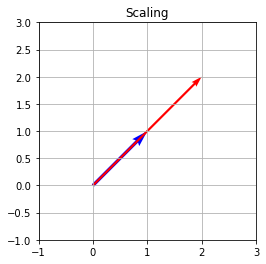

In [19]:
import matplotlib.pyplot as plt

s = 2
A = np.array([[s, 0], [0, s]])  

x0, y0 = 0, 0  
v = np.array([1, 1]) 

# Initial vector in blue
plt.quiver(x0, y0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', width=0.015)

# Apply the scaling, color changed to red
u = np.dot(A, v)
plt.quiver(x0, y0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.01)  # thinner line

# Set the plot settings
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')

plt.title('Scaling')
plt.show()

<img src="https://github.com/kjbiener/introToJulia/blob/master/scaling.png?raw=true" alt="scaling" width="300">

Let's have a closer look into what just happened! For scaling we defined $A = \begin{bmatrix} s & 0 \\ 0 & s \end{bmatrix}$ and $v = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$. Then we computed $u$ via the action of $A$ on $v$; that is
\begin{align*}
    u = A v = \begin{bmatrix} s & 0 \\ 0 & s \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} s \cdot 1 + 0 \cdot 1 \\ 0 \cdot 1 + s \cdot 1 \end{bmatrix} = \begin{bmatrix} s \\ s \end{bmatrix}.
\end{align*}
With $s=2$, we get $u = \begin{bmatrix} 2 \\ 2 \end{bmatrix}$.

Recall that to multiply a matrix by a vector we use
\begin{align*}
    Av = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} a_{11} \cdot v_1 + a_{12} \cdot v_2 \\ a_{21} \cdot v_1 + a_{22} \cdot v_2 \end{bmatrix} = \begin{bmatrix} a_{11} \\ a_{21} \end{bmatrix} v_1 + \begin{bmatrix} a_{12} \\ a_{22} \end{bmatrix} v_2.
\end{align*}

In other words, the application of a $m \times n$ matrix on a $n \times 1$ vector (called $n$-vector) results in the weighted sum of the matrix columns. The weights from the vector entries have the corresponding index with the matrix columns.

### Rotation

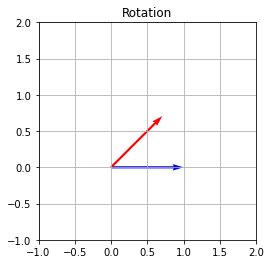

In [20]:
theta = np.pi / 4  # 45 degree rotation

# 2D rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)], 
              [np.sin(theta), np.cos(theta)]])

v = np.array([1, 0])  # initial vector

# Apply the rotation
u = np.dot(R, v)

x0, y0 = 0, 0  # origin point

# Initial vector (blue)
plt.quiver(x0, y0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', width=0.01)

# Rotated vector (red and thinner)
plt.quiver(x0, y0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.01)

plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')

plt.title('Rotation')
plt.show()

<img src="https://github.com/kjbiener/introToJulia/blob/master/rotation_2d.png?raw=true" alt="Rotation" width="300">

Similarly for the rotation example we have
\begin{align*}
    R v = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} \cos(\theta) \cdot v_1 - \sin(\theta) \cdot v_2 \\ \sin(\theta) \cdot v_1 + \cos(\theta) \cdot v_2 \end{bmatrix} = \begin{bmatrix} \cos(\theta) \\ \sin(\theta) \end{bmatrix} v_1 + \begin{bmatrix} -\sin(\theta) \\ \cos(\theta) \end{bmatrix} v_2.
\end{align*}


With $\theta = \frac{\pi}{4}$ and $v = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, we have
\begin{align*}
    u = \begin{bmatrix} \cos(\frac{\pi}{4}) & -\sin(\frac{\pi}{4}) \\ \sin(\frac{\pi}{4}) & \cos(\frac{\pi}{4}) \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0.7071 \cdot 1 - 0.7071 \cdot 0 \\ 0.7071 \cdot 1 + 0.7071 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0.7071 \\ 0.7071 \end{bmatrix} 1 + \begin{bmatrix} -0.7071 \\ 0.7071 \end{bmatrix} 0 = \begin{bmatrix} 0.7071 \\ 0.7071 \end{bmatrix}.
\end{align*}

# Rotation

### Learning Objectives
- 2D and 3D rotation matrices as linear transformations.
- Righ-hand rule to rotate about an axis.

### Outcomes
- Understanding the relationship between rotation matrices and coordinate frames.
- A common 2D and 3D rotation convention.

### [Rotation](https://en.wikipedia.org/wiki/Rotation) 

A rotation is a circular movement of an object around a center (or point) of rotation. A three-dimensional object can always be rotated about an infinite number of imaginary lines called rotation axis.

![A sphere rotating about an axis](https://upload.wikimedia.org/wikipedia/commons/0/02/Rotating_Sphere.gif)

First, let's derive the 2D rotation matrix using what we have learned so far and some basic trigonometry. Consider the unit vectors of the 2D plane
\begin{equation*}
    e_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad e_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix},
\end{equation*}

<img src="https://github.com/kjbiener/introToJulia/blob/master/2d_univec.png?raw=true" alt="2D unit vectors" width="450">

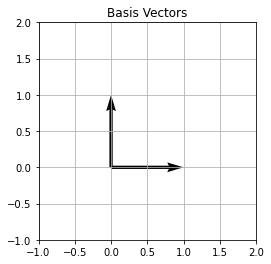

In [21]:
e1 = np.array([1, 0])
e2 = np.array([0, 1])
E = np.column_stack((e1, e2))

x0, y0 = 0, 0

plt.quiver([x0, x0], [y0, y0], E[0,:], E[1,:], angles='xy', scale_units='xy', scale=1, width=0.015)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')

plt.title('Basis Vectors')
plt.show()

We rotate $e_1$ and $e_2$ by an arbitrary angle $\theta$. Note that $e_1$ and $e_2$ remain perpendicular. The results are two new unit vectors, $e'_1$ and $e'_2$, shown in red.

<img src="https://github.com/kjbiener/introToJulia/blob/master/rotated_2d_univec.png?raw=true" alt="Rotated 2D unit vectors" width="450">

**Problem:** We wish to find the mapping $(e_1, e_2) \mapsto (e'_1,e'_2)$ and a matrix representation of it.

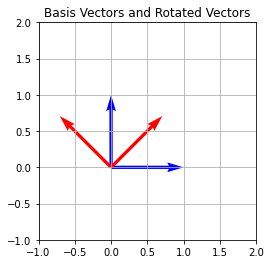

In [22]:
theta = np.pi / 4  # 45 degree rotation

# 2D rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)], 
              [np.sin(theta), np.cos(theta)]])

e1 = np.array([1, 0])
e2 = np.array([0, 1])
E = np.column_stack((e1, e2))  # basis vectors

V = np.dot(R, E)  # rotated vectors

# Original vectors 
plt.quiver([0, 0], [0, 0], E[0,:], E[1,:], angles='xy', scale_units='xy', scale=1, color = 'b', width=0.015)

# Rotated vectors
plt.quiver([0, 0], [0, 0], V[0,:], V[1,:], angles='xy', scale_units='xy', scale=1, color = 'r', width=0.015)

plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')

plt.title('Basis Vectors and Rotated Vectors')
plt.show()

**Problem:** We wish to find the mapping $(e_1, e_2) \mapsto (e'_1,e'_2)$ and a matrix representation of it.

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Rotation_of_coordinates.svg" alt="Rotated 2D unit vectors" width="350">

We recognize that $e'_1$ and $e'_2$ vectors in the blue coordinates can be expressed as 
\begin{equation*}
    e'_1 = \begin{bmatrix} \cos(\theta) \\ \sin(\theta) \end{bmatrix}, \quad e'_2 = \begin{bmatrix} -\sin(\theta) \\ \cos(\theta) \end{bmatrix}.
\end{equation*}

We learn that any vector (or point) in the red coordinates can be expressed as a linear combinations of $e'_1$ and $e'_2$. This is analogous to using $e_1$ and $e_2$ as *basis* for the blue *coordinate frame*. 

**Remark:** This way of finding the solution by using a linear combinations of different *dimensions (here each unit vector as a basis)* is a fundamental property of linear maps and is called [*superposition*](https://en.wikipedia.org/wiki/Superposition_principle).

In other words, let $v = \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = v_1 e'_1 + v_2 e'_2$ and $v' = \begin{bmatrix} v'_1 \\ v'_2 \end{bmatrix} = v'_1 e_1 + v'_2 e_2 = v_1 e'_1 + v_2 e'_2$. 

We learn that
\begin{align*}
    v'_1 = v_1 \cos(\theta) - v_2 \sin(\theta), \\
    v'_2 = v_1 \sin(\theta) + v_2 \cos(\theta).
\end{align*}

We are now one step away from deriving the 2D rotation matrix. We proceed as follows:

$$
v' = \begin{bmatrix} v'_1 \\ v'_2 \end{bmatrix} = \begin{bmatrix} v_1 \cos(\theta) - v_2 \sin(\theta) \\ v_1 \sin(\theta) + v_2 \cos(\theta) \end{bmatrix} = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix},
$$

thus, we proved that

$$
v' = Rv,
$$

where we define

$$
R := \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}.
$$


We are now one step away from deriving the 2D rotation matrix. We proceed as follows.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Right-hand_grip_rule.svg/340px-Right-hand_grip_rule.svg.png" alt="Right-hand grip rule" width="200">

### [Circle group](https://en.wikipedia.org/wiki/Circle_group)

What are the transformations that leave the circle unchanged?

Multiplication on the circle group is equivalent to addition of angles. 
<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Circle-group.svg" alt="Circle" width="200">

$e^{i\theta} = \cos(\theta) + i \sin(\theta) \leftrightarrow \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix} = R(\theta)$

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c1/Yaw_Axis_Corrected.svg" alt="RPY" width="400">

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Roll_pitch_yaw_mnemonic.svg" alt="Euler angles" width="350">

**Quiz:** Prove that the 3D rotation about $z$ axis in $\mathbb{R}^3$ is indeed (notice its similarity with the 2D rotation matrix)

\begin{equation*}
    R_z = \begin{bmatrix} \cos(\gamma) & -\sin(\gamma) & 0 \\ \sin(\gamma) & \cos(\gamma) & 0 \\ 0 & 0 & 1 \end{bmatrix}.
\end{equation*}

**Answer:** 

In the 3D space, we can define the unit vectors along $x$,$y$, and $z$ axes, respectively, as
\begin{equation*}
    e_1 = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \quad e_2 = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \quad e_3 = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}.
\end{equation*}

Similar to the 2D case, we recognize that after a $\gamma$ (the angle) rotation about $z$ axis we have $e'_1$, $e'_2$, and $e'_3$ vectors can be expressed as 
\begin{equation*}
    e'_1 = \begin{bmatrix} \cos(\gamma) \\ \sin(\gamma) \\ 0 \end{bmatrix}, \quad e'_2 = \begin{bmatrix} -\sin(\gamma) \\ \cos(\gamma) \\ 0 \end{bmatrix}, \quad e'_3 = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}.
\end{equation*}

We note that $e'_3 = e_3$ since it is the *axis of rotation*. 

Let $v = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix} = v_1 e'_1 + v_2 e'_2 + v_3 e'_3$ be a vector in the rotated basis, then its equivalent in the standard basis is $v' = \begin{bmatrix} v'_1 \\ v'_2 \\ v'_3 \end{bmatrix} = v'_1 e_1 + v'_2 e_2 + v'_3 e_3 = v_1 e'_1 + v_2 e'_2 + v_3 e'_3$. This equality leads to
\begin{equation*}
    \boxed{\begin{bmatrix} v'_1 \\ v'_2 \\ v'_3 \end{bmatrix} = \begin{bmatrix} \cos(\gamma) & -\sin(\gamma) & 0 \\ \sin(\gamma) & \cos(\gamma) & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix}}.
\end{equation*}
$$
R_z := \boxed{\begin{bmatrix} \cos(\gamma) & -\sin(\gamma) & 0 \\ \sin(\gamma) & \cos(\gamma) & 0 \\ 0 & 0 & 1 \end{bmatrix}}.
$$


**Quiz:** Derive 3D rotation matrices about $y$ and $x$ axes in $\mathbb{R^3}$.
\begin{equation*}
    R_y = \begin{bmatrix} \cos(\beta) & 0 & \sin(\beta) \\ 0 & 1 & 0 \\ -\sin(\beta) & 0 & \cos(\beta) \end{bmatrix},
\end{equation*}
$$
    R_x = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos(\alpha) & -\sin(\alpha) \\ 0 & \sin(\alpha) & \cos(\alpha) \end{bmatrix}.
$$

# Affine Transformation

### Learning Objectives
- Affine transformations.
- Difference between linear and affine transformations.

### Outcomes
- Affine transformation of a vector.
- Rigid body transformation.

### [Affine Transformation](https://en.wikipedia.org/wiki/Affine_transformation) 

So far, we have learned about linear transformations. We also learned that translation is not a linear transformation. We now look into another important class of transformations called *affine transformations*.

An affine transformation in simple words is a combination of a linear transformation and translation.

- Suppose $A$ is linear transformation and $t$ is a vector. Then the affine transformation of a vector (or point) is $y = A x + t$. 

- A particular affine transformation that combines rotation and translation is called a *rigid body transformation*. As the name implies, objects that go through a rigid body transformation remain *rigid*. This means, for example, no scaling, shear, or deformation and the distance between every pair of points remain the same. 

**Example:** To understand the concept of a rigid body transformation better, we will code an example. We will build a pyramid first. Then we will rotate and translate it in the 3D Cartesian coordinate frame. If we consider a pyramid as a combination of five points connected with lines, we get the following shape.

![pyramid.png](https://i.postimg.cc/90XS6GqJ/pyramid.png)

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

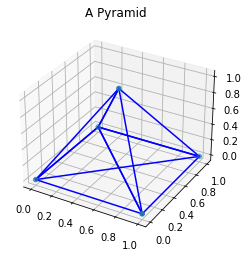

In [23]:
# 3D coordinates
x = np.array([0, 0, 1, 1, 0, 0.5])
y = np.array([0, 1, 1, 0, 1, 0.5])
z = np.array([0, 0, 0, 0, 0, 1])
E = np.vstack([x,y,z])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter
ax.scatter(E[0,:], E[1,:], E[2,:])

# Add lines
for i in range(E.shape[1]):
    for j in range(i+1, E.shape[1]):
        ax.plot(E[0, [i, j]], E[1, [i, j]], E[2, [i, j]],'blue')

ax.set_title('A Pyramid')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Next, we apply the following transformation to all five points and visualize the results. 
\begin{equation*}
    R = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos(\alpha) & -\sin(\alpha) \\ 0 & \sin(\alpha) & \cos(\alpha) \end{bmatrix}, \quad t = \begin{bmatrix} 0.5 \\ 0.75 \\ 1 \end{bmatrix}. 
\end{equation*}

We set $\alpha = \frac{\pi}{4}$. As expected we have rotated the pyramid by $\frac{\pi}{4}$ about $x$ axis and translated it by $t$.



![pyramid-transformed.png](https://i.postimg.cc/tgHr0hKW/pyramid-transformed.png)

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

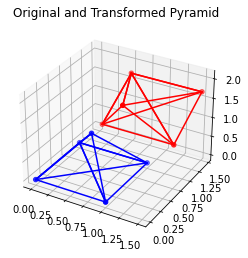

In [ ]:
alpha = np.pi / 4
R = np.array([[1, 0, 0], 
              [0, np.cos(alpha), -np.sin(alpha)], 
              [0, np.sin(alpha), np.cos(alpha)]])
t = np.array([[0.5], [0.75], [1]])

x = np.array([0, 0, 1, 1, 0, 0.5])
y = np.array([0, 1, 1, 0, 1, 0.5])
z = np.array([0, 0, 0, 0, 0, 1])
E = np.vstack([x, y, z])

E2 = np.dot(R, E) + t 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot original pyramid
ax.scatter(E[0,:], E[1,:], E[2,:], color='blue')
for i in range(E.shape[1]):
    for j in range(i+1, E.shape[1]):
        ax.plot(E[0, [i, j]], E[1, [i, j]], E[2, [i, j]],'blue')

# Plot transformed pyramid
ax.scatter(E2[0,:], E2[1,:], E2[2,:], color='red')
for i in range(E2.shape[1]):
    for j in range(i+1, E2.shape[1]):
        ax.plot(E2[0, [i, j]], E2[1, [i, j]], E2[2, [i, j]],'red')

ax.set_title('Original and Transformed Pyramid')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Things we do with transformations on UMich North Campus!

[![InEKF LiDAR Mapping](https://i.imgur.com/BwtIepo.jpg)](https://www.youtube.com/watch?v=pNyXsZ5zVZk)